# (a) Load the data.
Report the size of the training and testing sets. How many Class (1) and Class (0) samples are in the training set and the testing set, respectively?

In [28]:
import pandas as pd

PCA_test = pd.read_csv("HW2_data/pca_test.csv")
PCA_train = pd.read_csv("HW2_data/pca_train.csv")

print(PCA_test.shape)
print(PCA_train.shape)

print('Test:')
print(PCA_test['Class'].value_counts())
print('Train:')
print(PCA_train['Class'].value_counts())

print(PCA_test.describe())
print(PCA_train.head())


(46, 61)
(146, 61)
Test:
Class
0    24
1    22
Name: count, dtype: int64
Train:
Class
0    78
1    68
Name: count, dtype: int64
           Attr1      Attr2      Attr3      Attr4      Attr5      Attr6  \
count  46.000000  46.000000  46.000000  46.000000  46.000000  46.000000   
mean    0.034761   0.039830   0.047804   0.053122   0.075287   0.105335   
std     0.028627   0.031414   0.036701   0.038614   0.052001   0.067920   
min     0.004000   0.002000   0.002000   0.006000   0.007000   0.016800   
25%     0.015300   0.015000   0.026250   0.026000   0.041250   0.054450   
50%     0.028500   0.033000   0.036500   0.045500   0.065000   0.086500   
75%     0.038050   0.048600   0.060900   0.074500   0.096000   0.151250   
max     0.142000   0.128000   0.186000   0.166000   0.262000   0.312000   

           Attr7      Attr8      Attr9     Attr10  ...     Attr52     Attr53  \
count  46.000000  46.000000  46.000000  46.000000  ...  46.000000  46.000000   
mean    0.524296   0.144913   0.2073

# (b) Preprocessing Data-Normalization:
Please run normalization on all input features in both the training and testing datasets to obtain the normalized training and the normalized testing datasets. (Hint: you need to use the min/max of each column in the training dataset to normalize the testing dataset, and do NOT normalize the output ”Class” of data.)

In [29]:
features = PCA_train.drop(columns=['Class']).columns

train_min = PCA_train[features].min()
train_max = PCA_train[features].max()

train_normalization = (PCA_train[features] - train_min) / (train_max - train_min)
test_normalization = (PCA_test[features] - train_min) / (train_max - train_min)

train_normalization['Class'] = PCA_train['Class']
test_normalization['Class'] = PCA_test['Class']

print("NaN: ",train_normalization.isna().any().any() or test_normalization.isna().any().any())
print("Inf:", train_normalization.isin([float('inf'), float('-inf')]).any().any()) or (test_normalization.isin([float('inf'), float('-inf')]).any().any())

print(train_normalization.describe())
#print(train_normalization.head())
#print(test_normalization.head())

NaN:  False
Inf: False
            Attr1       Attr2       Attr3       Attr4       Attr5       Attr6  \
count  146.000000  146.000000  146.000000  146.000000  146.000000  146.000000   
mean     0.222411    0.175789    0.152603    0.108939    0.166743    0.242807   
std      0.191504    0.155565    0.140376    0.125769    0.148534    0.166742   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.096691    0.068670    0.057971    0.039689    0.067625    0.143929   
50%      0.166176    0.133047    0.122200    0.083658    0.126796    0.206541   
75%      0.277574    0.227468    0.204875    0.127918    0.226120    0.309700   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            Attr7       Attr8       Attr9      Attr10  ...      Attr52  \
count  146.000000  146.000000  146.000000  146.000000  ...  146.000000   
mean     0.236811    0.285699    0.282786    0.235082  ...    0.198434   
std      0.140986    0.19

# i. Calculate the covariance matrix of the NEW training dataset.
Please 1) specify the dimension of the resulted covariance matrix and 2) given the space limitation, please report the first 5 ∗ 5 of the covariance matrix, that is, only reporting the first five rows and the first five columns of the entire covariance matrix.

In [31]:
import numpy as np

train_features_only = train_normalization.drop(columns=['Class'])
cov_matrix = np.cov(train_features_only, rowvar=False)

print("Covariance matrix shape:", cov_matrix.shape)
print("First 5 * 5:")
print(cov_matrix[:5,:5])

Covariance matrix shape: (60, 60)
First 5 * 5:
[[0.03667374 0.01993076 0.01566491 0.00845833 0.00884005]
 [0.01993076 0.02420038 0.01708202 0.01082221 0.00960302]
 [0.01566491 0.01708202 0.01970539 0.01241038 0.01275864]
 [0.00845833 0.01082221 0.01241038 0.01581789 0.01367937]
 [0.00884005 0.00960302 0.01275864 0.01367937 0.02206249]]


# ii. Calculate the eigenvalues and the eigenvectors based on the entire covariance matrix in (i) above.
Report the size of the covariance matrix and the 5 largest eigenvalues.

In [39]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
#https://numpy.org/doc/2.1/reference/generated/numpy.linalg.eigh.html#

idx = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:, idx]

print("Covariance matrix shape:", cov_matrix.shape)
print("Eigenvalues count:", eigenvalues_sorted.shape[0])
print("5 largest eigenvalues:", eigenvalues_sorted[:5])

Covariance matrix shape: (60, 60)
Eigenvalues count: 60
5 largest eigenvalues: [0.31561862 0.26293792 0.11937781 0.09775916 0.09506303]


# iii. Display the eigenvalues using a bar graph or a plot, and choose a reasonable number(s) of eigenvectors. 
Justify your answer.

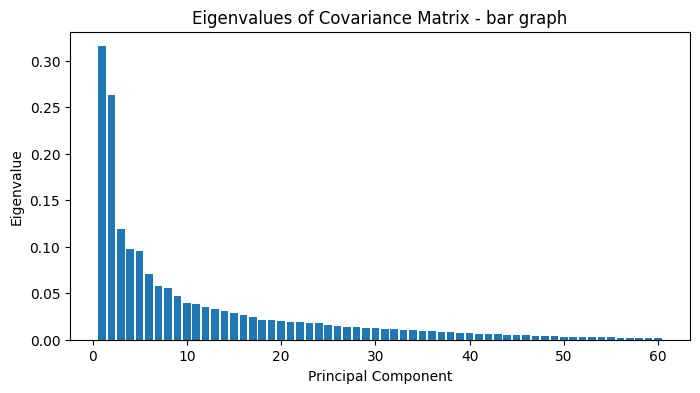

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(eigenvalues_sorted) + 1), eigenvalues_sorted)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Covariance Matrix - bar graph')
plt.show()

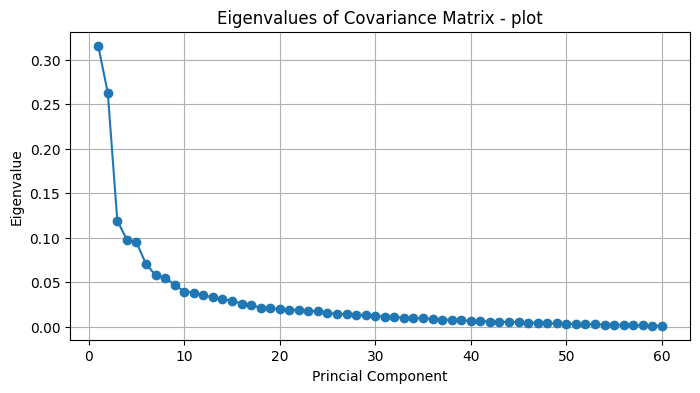

In [38]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues_sorted) + 1), eigenvalues_sorted, marker='o')
plt.xlabel('Princial Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Covariance Matrix - plot')
plt.grid(True)
plt.show()

: The eigenvalues decrease sharply for the first few principal components and then gradually decline, forming an elbow pattern. Therefore, selecting 10 principal components, where the decrease starts to stabilize, seems reasonable. This choice avoids unnecessary dimensionality and improves computational efficiency.

# iv. Next, you will combine PCA with a K-nearest neighbor (KNN) classifier. 
More specifically, PCA will be applied to reduce the dimensionality of data by transforming the original data into p (p ≤ 60) principal components; and then KNN (K = 5, euclidean distance as distance metric) will be employed to the p principal components for classification.

Report the accuracy of the NEW testing dataset when using PCA (p = 4) with 5NN. To show your work, please submit the corresponding csv file (including the name of csv file in your answer below).Your csv file should have 6 columns: columns 1-4 are the 4 principal components, column 5 is the original ground truth output ”Class”, and the last column is the predicted output ”Class”.

In [48]:
from sklearn.neighbors import KNeighborsClassifier

Xtrain = train_normalization.drop(columns=['Class']).values
Ytrain = train_normalization['Class'].values
Xtest = test_normalization.drop(columns=['Class']).values
Ytest = test_normalization['Class'].values

def project_with_p(X, W, p):
    W_p = W[:, :p]
    return X @ W_p

def knn_acc_for_p(p):
    Xtrain_p = project_with_p(Xtrain, eigenvectors_sorted, p)
    Xtest_p = project_with_p(Xtest, eigenvectors_sorted, p)
    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn.fit(Xtrain_p, Ytrain)
    prediction = knn.predict(Xtest_p)
    acc = (prediction == Ytest).mean()
    return acc, prediction, Xtest_p


p = 4
acc_p4, prediction_p4, Xtest_p4 = knn_acc_for_p(p)

p4_df = pd.DataFrame(
    np.column_stack([Xtest_p4, Ytest, prediction_p4]),
    columns=[f"PC{i+1}" for i in range(p)] + ["True_Class", "Predicted_Class"]
)
csv_filename = "b.iv_pca_knn_p4_results.csv"
p4_df.to_csv(csv_filename, index=False)

print(f"[p=4] Test Accuracy: {acc_p4:.4f}")
print(f"Saved CSV: {csv_filename}")

[p=4] Test Accuracy: 0.7391
Saved CSV: b.iv_pca_knn_p4_results.csv


Plot your results by varying p: 2, 4, 8, 10, 20, 40 and 60 respectively. In your plot, the x-axis represents the number of principal components and the y-axis refers to the accuracy of the NEW testing dataset using the corresponding number of principal components and 5NN.

Accuracies by p: [(2, np.float64(0.6304347826086957)), (4, np.float64(0.7391304347826086)), (8, np.float64(0.8043478260869565)), (10, np.float64(0.8260869565217391)), (20, np.float64(0.8695652173913043)), (40, np.float64(0.8478260869565217)), (60, np.float64(0.8695652173913043))]


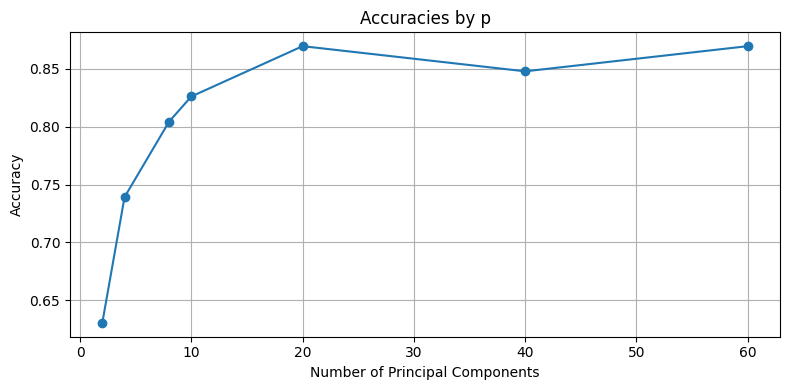

In [51]:
p_values = [2, 4, 8, 10, 20, 40, 60]
accuracies = []
for pv in p_values:
    acc, _, _ = knn_acc_for_p(pv)
    accuracies.append(acc)

print("Accuracies by p:", list(zip(p_values, accuracies)))

plt.figure(figsize = (8, 4))
plt.plot(p_values, accuracies, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracies by p')
plt.grid(True)
plt.tight_layout()
plt.show()

Based upon the (PCA + 5NN)’s results above, what is the most ”reasonable” number of principal components among all the choices? Justify your answer.

: Accuracy increases steadily and sharply between p=2 and p=20, reaching its highest value at p=20. After p=20, the accuracy slightly decreases and shows only minor fluctuations. Therefore, p appears to be the most resonable number of principal components, as it achieves the highest accuracy while avoiding unnecessary dimensionality increase and reducing computational cost.

# (c) Preprocess Data-Standardization:
Similarly, please run standardization on all input features to obtain the standardized training and the standardized testing datasets. Then repeat the four steps i-iv in (b) above on the two NEW standardized datasets.

In [54]:
features = PCA_train.drop(columns=['Class']).columns
train_mean = PCA_train[features].mean()
train_standardization = PCA_train[features].std(ddof=0)

train_standardization_df = (PCA_train[features] - train_mean) / train_standardization
test_standardization_df = (PCA_test[features] - train_mean) / train_standardization

train_standardization_df['Class'] = PCA_train['Class'].values
test_standardization_df['Class'] = PCA_test['Class'].values

print("NaN: ",train_standardization_df.isna().any().any() or test_standardization_df.isna().any().any())
print("Inf:", train_standardization_df.isin([float('inf'), float('-inf')]).any().any()) or (test_standardization_df.isin([float('inf'), float('-inf')]).any().any())

print(train_standardization_df.describe())

NaN:  False
Inf: False
              Attr1         Attr2         Attr3         Attr4         Attr5  \
count  1.460000e+02  1.460000e+02  1.460000e+02  1.460000e+02  1.460000e+02   
mean  -2.250863e-16 -1.034180e-16 -1.216683e-17  1.155849e-16 -2.395344e-17   
std    1.003442e+00  1.003442e+00  1.003442e+00  1.003442e+00  1.003442e+00   
min   -1.165391e+00 -1.133897e+00 -1.090842e+00 -8.691617e-01 -1.126451e+00   
25%   -6.587488e-01 -6.909568e-01 -6.764503e-01 -5.525075e-01 -6.696049e-01   
50%   -2.946597e-01 -2.757001e-01 -2.173233e-01 -2.017044e-01 -2.698641e-01   
75%    2.890388e-01  3.333430e-01  3.736555e-01  1.514271e-01  4.011293e-01   
max    4.074410e+00  5.316423e+00  6.057412e+00  7.109282e+00  5.629167e+00   

              Attr6         Attr7         Attr8         Attr9        Attr10  \
count  1.460000e+02  1.460000e+02  1.460000e+02  1.460000e+02  1.460000e+02   
mean   1.338351e-16  1.186266e-16 -1.095014e-16 -1.307934e-16  1.155849e-16   
std    1.003442e+00  1.00344

# (c) i. Calculate the covariance matrix of the NEW training dataset.
Please 1) specify the dimension of the resulted covariance matrix and 2) given the space limitation, please report the first 5 ∗ 5 of the covariance matrix, that is, only reporting the first five rows and the first five columns of the entire covariance matrix.

In [56]:
train_features_only_standardization = train_standardization_df.drop(columns=['Class'])
cov_matrix_standardization = np.cov(train_features_only_standardization, rowvar=False)

print("Covariance matrix shape of Standardization:", cov_matrix_standardization.shape)
print("First 5 * 5:")
print(cov_matrix_standardization[:5,:5])

Covariance matrix shape of Standardization: (60, 60)
First 5 * 5:
[[1.00689655 0.67362775 0.58673595 0.35360459 0.31292083]
 [0.67362775 1.00689655 0.78762676 0.5569491  0.41846036]
 [0.58673595 0.78762676 1.00689655 0.70778774 0.61612573]
 [0.35360459 0.5569491  0.70778774 1.00689655 0.73730849]
 [0.31292083 0.41846036 0.61612573 0.73730849 1.00689655]]


# (c) ii. Calculate the eigenvalues and the eigenvectors based on the entire covariance matrix in (c) (i) above.
Report the size of the covariance matrix and the 5 largest eigenvalues.

In [57]:
eigenvalues_standardization, eigenvectors_standardization = np.linalg.eigh(cov_matrix_standardization)

idx = np.argsort(eigenvalues_standardization)[::-1]
eigenvalues_standardization_sorted = eigenvalues_standardization[idx]
eigenvectors_standardization_sorted = eigenvectors_standardization[:, idx]

print("Covariance matrix shape of standardization:", cov_matrix_standardization.shape)
print("Eigenvalues count:", eigenvalues_standardization_sorted.shape[0])
print("5 largest eigenvalues:", eigenvalues_standardization_sorted[:5])

Covariance matrix shape of standardization: (60, 60)
Eigenvalues count: 60
5 largest eigenvalues: [10.11452621  9.75529744  3.88640751  3.27856188  2.90770515]


# (c) iii. Display the eigenvalues using a bar graph or a plot, and choose a reasonable number(s) of eigenvectors. 
Justify your answer.

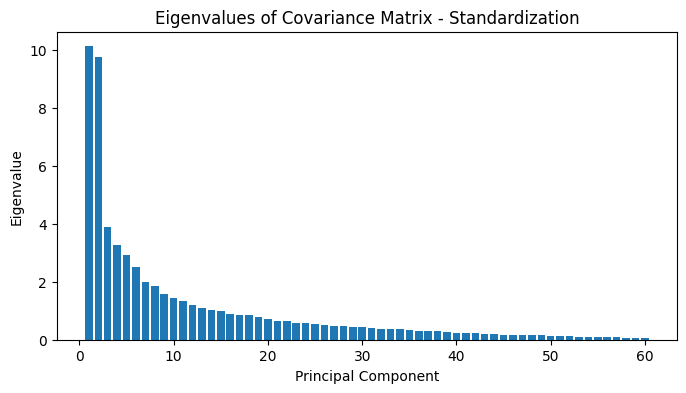

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(eigenvalues_standardization_sorted) + 1), eigenvalues_standardization_sorted)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Covariance Matrix - Standardization')
plt.show()

: The eigenvalue plot for the standardized dataset shows a steep drop in the first few principal components, followed by an elbow pattern. A reasonable choice of principal components is around 10, as selecting more than that would lead to unnecessary dimensionality increase and higher computational cost without substantial performance gain.

# (c) iv. Next, you will combine PCA with a K-nearest neighbor (KNN) classifier. 
More specifically, PCA will be applied to reduce the dimensionality of data by transforming the original data into p (p ≤ 60) principal components; and then KNN (K = 5, euclidean distance as distance metric) will be employed to the p principal components for classification.

Report the accuracy of the NEW testing dataset when using PCA (p = 4) with 5NN. To show your work, please submit the corresponding csv file (including the name of csv file in your answer below).Your csv file should have 6 columns: columns 1-4 are the 4 principal components, column 5 is the original ground truth output ”Class”, and the last column is the predicted output ”Class”.

In [63]:
Xtrain_standardization = train_standardization_df.drop(columns=['Class']).values
Ytrain_standardization = train_standardization_df['Class'].values
Xtest_standardization = test_standardization_df.drop(columns=['Class']).values
Ytest_standardization = test_standardization_df['Class'].values

def project_with_p_standardization(X, W, p):
    W_p = W[:, :p]
    return X @ W_p

def knn_acc_for_p_standardization(p):
    Xtrain_p_standardization = project_with_p_standardization(Xtrain_standardization, eigenvectors_standardization_sorted, p)
    Xtest_p_standardization = project_with_p_standardization(Xtest_standardization, eigenvectors_standardization_sorted, p)
    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn.fit(Xtrain_p_standardization, Ytrain_standardization)
    prediction = knn.predict(Xtest_p_standardization)
    acc = (prediction == Ytest_standardization).mean()
    return acc, prediction, Xtest_p_standardization


p = 4
acc_p4_standardization, prediction_p4_standardization, Xtest_p4_standardization = knn_acc_for_p_standardization(p)

p4_standardization_df = pd.DataFrame(
    np.column_stack([Xtest_p4_standardization, Ytest_standardization, prediction_p4_standardization]),
    columns=[f"PC{i+1}" for i in range(p)] + ["True_Class", "Predicted_Class"]
)
csv_filename_standardization = "c.iv_standardization_pca_knn_p4_results.csv"
p4_standardization_df.to_csv(csv_filename_standardization, index=False)

print(f"[standardization,p=4] Test Accuracy: {acc_p4_standardization:.4f}")
print(f"Saved CSV: {csv_filename_standardization}")

[standardization,p=4] Test Accuracy: 0.7609
Saved CSV: c.iv_standardization_pca_knn_p4_results.csv


Plot your results by varying p: 2, 4, 8, 10, 20, 40 and 60 respectively. In your plot, the x-axis represents the number of principal components and the y-axis refers to the accuracy of the NEW testing dataset using the corresponding number of principal components and 5NN.

Accuracies of standardization by p: [(2, np.float64(0.5434782608695652)), (4, np.float64(0.7608695652173914)), (8, np.float64(0.782608695652174)), (10, np.float64(0.782608695652174)), (20, np.float64(0.8043478260869565)), (40, np.float64(0.8478260869565217)), (60, np.float64(0.8478260869565217))]


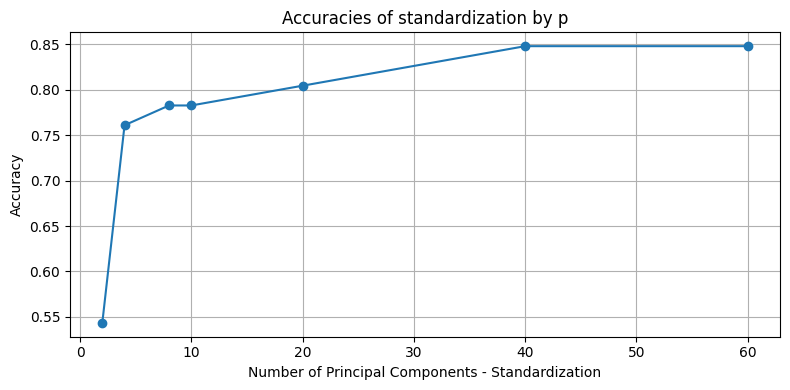

In [64]:
p_values = [2, 4, 8, 10, 20, 40, 60]
accuracies_standardization = []
for pv_standardization in p_values:
    acc_standardization, _, _ = knn_acc_for_p_standardization(pv_standardization)
    accuracies_standardization.append(acc_standardization)

print("Accuracies of standardization by p:", list(zip(p_values, accuracies_standardization)))

plt.figure(figsize = (8, 4))
plt.plot(p_values, accuracies_standardization, marker='o')
plt.xlabel('Number of Principal Components - Standardization')
plt.ylabel('Accuracy')
plt.title('Accuracies of standardization by p')
plt.grid(True)
plt.tight_layout()
plt.show()

The current graph shows a sharp increase in accuracy from 2 to 6 principal components, followed by a gradual but consistent improvement up to 40 components. Beyond 40 compoents, the accuracy remains nearly unchanged. Therefore, using 40 principal components appears to be the most reasonable choice, as it achieves high accuracy without unnecessary dimensionality increase.